# 数据处理
## 载入数据

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
import lightgbm as lgb

In [2]:
train = pd.read_csv('./train/train.csv', na_values = -1)
test = pd.read_csv('./test/test.csv', na_values = -1)

train['target'].value_counts()##数据不均衡

0    573518
1     21694
Name: target, dtype: int64

## 特征分类

In [3]:
values = list(train.columns)[2: ]
cate1 = []
cate2 = []
cate_con_or_ord = []
cat_cols = []
bin_cols = []

for col in train.columns:
    cols = col.split('_')
    if len(cols) == 3:
        cate1.append(cols[1])
        cate2.append('continuous or ordinal')
        cate_con_or_ord.append(col)
    if len(cols) == 4:
        cate1.append(cols[1])
        cate2.append(cols[3])
        if cols[3] == 'cat':
            cat_cols.append(col)
        if cols[3] == 'bin':
            bin_cols.append(col)
columns_df = pd.DataFrame({'category_1': cate1, 'category_2': cate2}, index = values)
columns_df

category_1             category_2
ps_ind_01             ind  continuous or ordinal
ps_ind_02_cat         ind                    cat
ps_ind_03             ind  continuous or ordinal
ps_ind_04_cat         ind                    cat
ps_ind_05_cat         ind                    cat
ps_ind_06_bin         ind                    bin
ps_ind_07_bin         ind                    bin
ps_ind_08_bin         ind                    bin
ps_ind_09_bin         ind                    bin
ps_ind_10_bin         ind                    bin
ps_ind_11_bin         ind                    bin
ps_ind_12_bin         ind                    bin
ps_ind_13_bin         ind                    bin
ps_ind_14             ind  continuous or ordinal
ps_ind_15             ind  continuous or ordinal
ps_ind_16_bin         ind                    bin
ps_ind_17_bin         ind                    bin
ps_ind_18_bin         ind                    bin
ps_reg_01             reg  continuous or ordinal
ps_reg_02             reg  continuous or ordinal
ps_reg_03             reg  continuous or ordinal
ps_car_01_cat         car                    cat
ps_car_02_cat         car                    cat
ps_car_03_cat         car                    cat
ps_car_04_cat         car                    cat
ps_car_05_cat         car                    cat
ps_car_06_cat         car                    cat
ps_car_07_cat         car                    cat
ps_car_08_cat         car                    cat
ps_car_09_cat         car                    cat
ps_car_10_cat         car                    cat
ps_car_11_cat         car                    cat
ps_car_11             car  continuous or ordinal
ps_car_12             car  continuous or ordinal
ps_car_13             car  continuous or ordinal
ps_car_14             car  continuous or ordinal
ps_car_15             car  continuous or ordinal
ps_calc_01           calc  continuous or ordinal
ps_calc_02           calc  continuous or ordinal
ps_calc_03           calc  continuous or ordinal
ps_calc_04           calc  continuous or ordinal
ps_calc_05           calc  continuous or ordinal
ps_calc_06           calc  continuous or ordinal
ps_calc_07           calc  continuous or ordinal
ps_calc_08           calc  continuous or ordinal
ps_calc_09           calc  continuous or ordinal
ps_calc_10           calc  continuous or ordinal
ps_calc_11           calc  continuous or ordinal
ps_calc_12           calc  continuous or ordinal
ps_calc_13           calc  continuous or ordinal
ps_calc_14           calc  continuous or ordinal
ps_calc_15_bin       calc                    bin
ps_calc_16_bin       calc                    bin
ps_calc_17_bin       calc                    bin
ps_calc_18_bin       calc                    bin
ps_calc_19_bin       calc                    bin
ps_calc_20_bin       calc                    bin

In [4]:
test[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 26 columns):
ps_ind_01     892816 non-null int64
ps_ind_03     892816 non-null int64
ps_ind_14     892816 non-null int64
ps_ind_15     892816 non-null int64
ps_reg_01     892816 non-null float64
ps_reg_02     892816 non-null float64
ps_reg_03     731132 non-null float64
ps_car_11     892815 non-null float64
ps_car_12     892816 non-null float64
ps_car_13     892816 non-null float64
ps_car_14     829011 non-null float64
ps_car_15     892816 non-null float64
ps_calc_01    892816 non-null float64
ps_calc_02    892816 non-null float64
ps_calc_03    892816 non-null float64
ps_calc_04    892816 non-null int64
ps_calc_05    892816 non-null int64
ps_calc_06    892816 non-null int64
ps_calc_07    892816 non-null int64
ps_calc_08    892816 non-null int64
ps_calc_09    892816 non-null int64
ps_calc_10    892816 non-null int64
ps_calc_11    892816 non-null int64
ps_calc_12    892816 non-null int64
ps_

In [5]:
train[cate_con_or_ord].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 26 columns):
ps_ind_01     595212 non-null int64
ps_ind_03     595212 non-null int64
ps_ind_14     595212 non-null int64
ps_ind_15     595212 non-null int64
ps_reg_01     595212 non-null float64
ps_reg_02     595212 non-null float64
ps_reg_03     487440 non-null float64
ps_car_11     595207 non-null float64
ps_car_12     595211 non-null float64
ps_car_13     595212 non-null float64
ps_car_14     552592 non-null float64
ps_car_15     595212 non-null float64
ps_calc_01    595212 non-null float64
ps_calc_02    595212 non-null float64
ps_calc_03    595212 non-null float64
ps_calc_04    595212 non-null int64
ps_calc_05    595212 non-null int64
ps_calc_06    595212 non-null int64
ps_calc_07    595212 non-null int64
ps_calc_08    595212 non-null int64
ps_calc_09    595212 non-null int64
ps_calc_10    595212 non-null int64
ps_calc_11    595212 non-null int64
ps_calc_12    595212 non-null int64
ps_

## 处理空值数据

('ps_car_03_cat', 411231)
('ps_car_05_cat', 266551)
('ps_reg_03', 107772)
('ps_car_14', 42620)
('ps_car_07_cat', 11489)
('ps_ind_05_cat', 5809)
('ps_car_09_cat', 569)
('ps_ind_02_cat', 216)
('ps_car_01_cat', 107)
('ps_ind_04_cat', 83)
('ps_car_02_cat', 5)
('ps_car_11', 5)
('ps_car_12', 1)


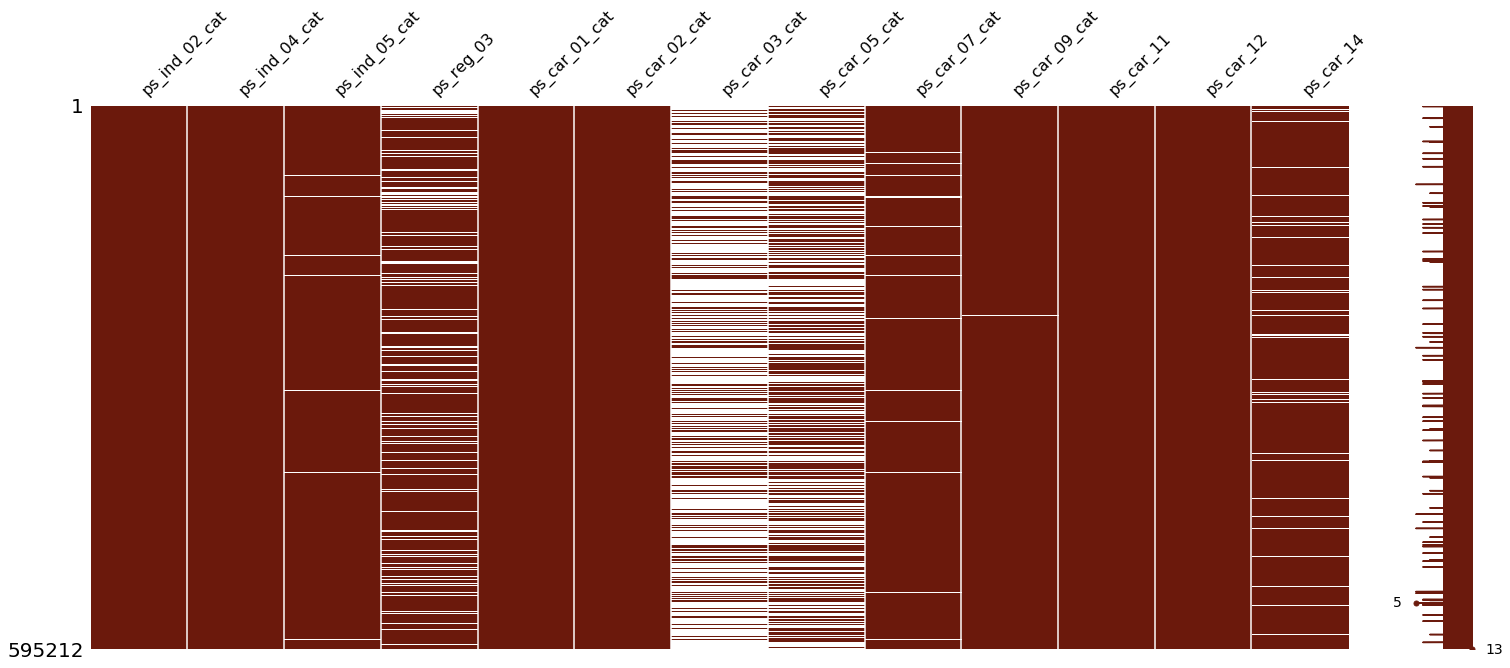

In [6]:
import missingno as msno

train_null_values = []
train_col_missing = []

for col in values:
    if len(train[col][train[col].isnull()].index):
        train_null_values.append((col, len(train[col][train[col].isnull()].index)))
        train_col_missing.append(col)
for i in sorted(train_null_values, key = lambda x: x[1], reverse = True):
    print(i)
msno.matrix(train[train_col_missing], color=(0.42, 0.1, 0.05))

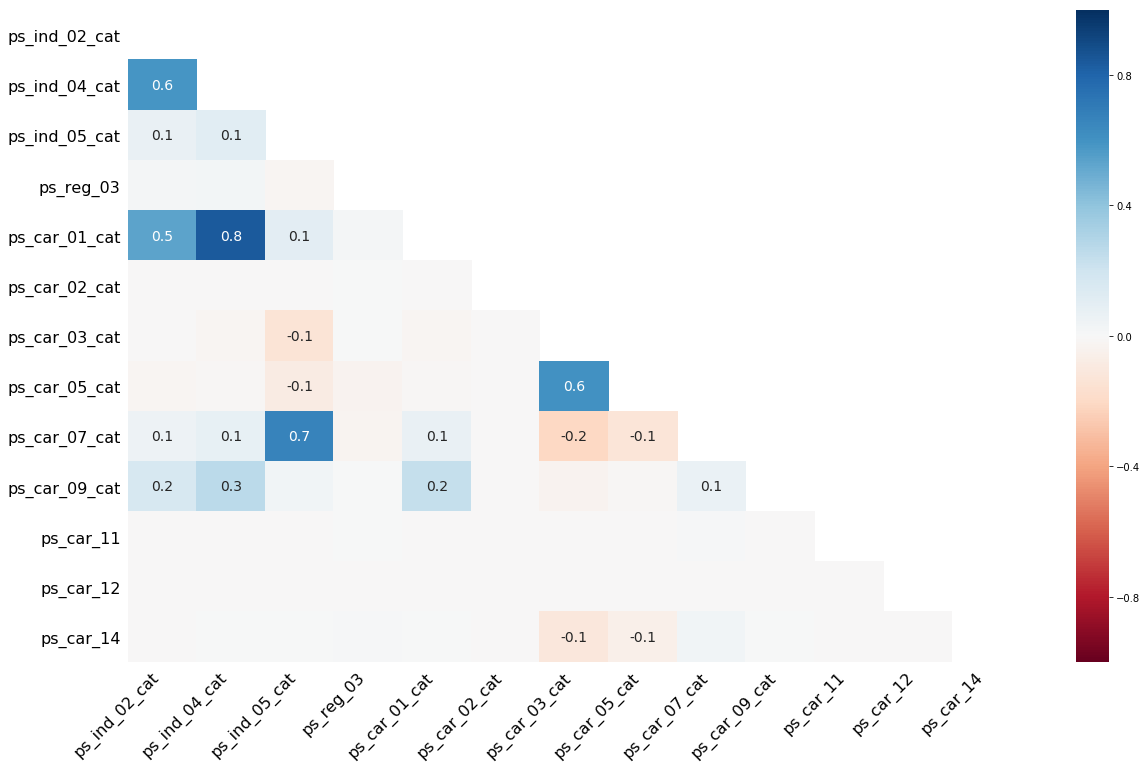

In [7]:
msno.heatmap(df = train[train_col_missing])

('ps_car_03_cat', 616911)
('ps_car_05_cat', 400359)
('ps_reg_03', 161684)
('ps_car_14', 63805)
('ps_car_07_cat', 17331)
('ps_ind_05_cat', 8710)
('ps_car_09_cat', 877)
('ps_ind_02_cat', 307)
('ps_car_01_cat', 160)
('ps_ind_04_cat', 145)
('ps_car_02_cat', 5)
('ps_car_11', 1)


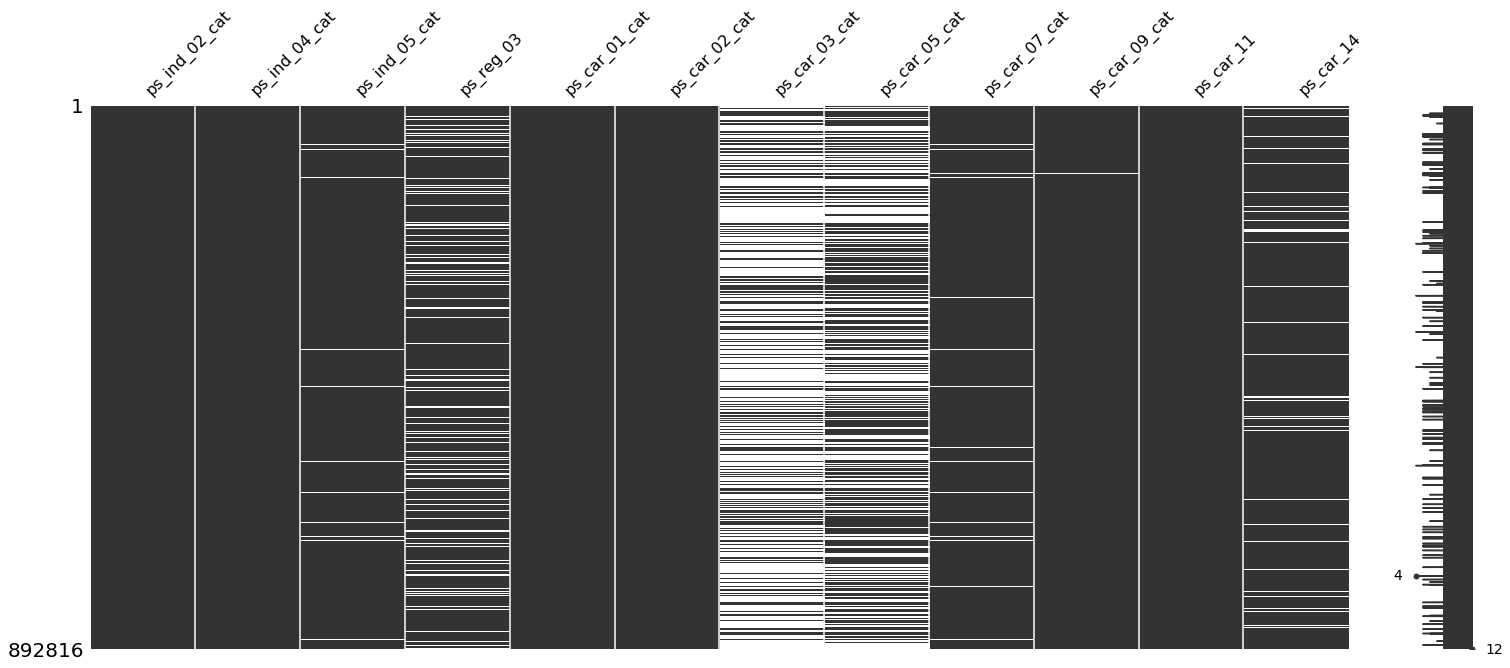

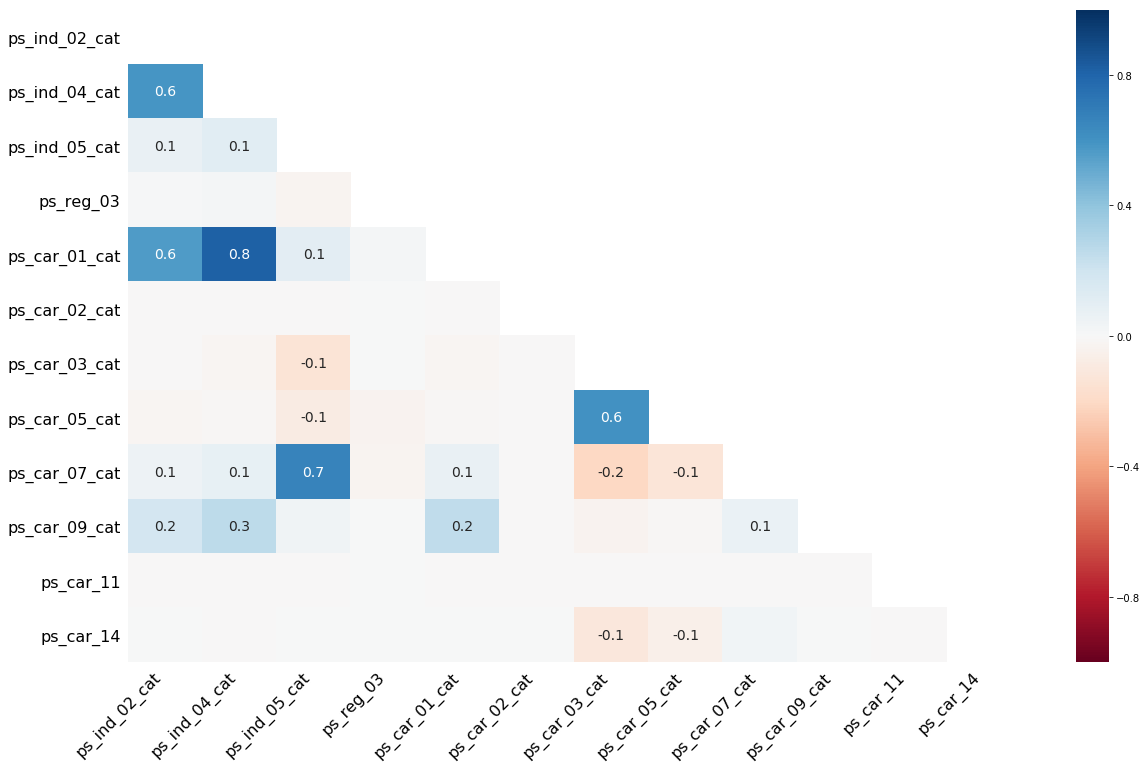

In [8]:
import missingno as msno

test_col_missing = []
test_null_values = []
for col in values:
    if len(test[col][test[col].isnull()].index):
        test_col_missing.append(col)
        test_null_values.append((col, len(test[col][test[col].isnull()].index)))
for i in sorted(test_null_values, key = lambda x: x[1], reverse = True):
    print(i)
    
msno.matrix(test[test_col_missing], color = (0.2, 0.2, 0.2))
msno.heatmap(test[test_col_missing])

## 相关性分析

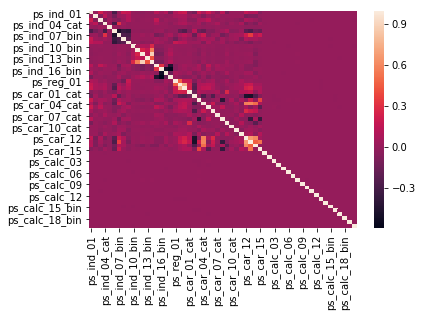

In [9]:
import seaborn as sns

sns.heatmap(train[values].corr())

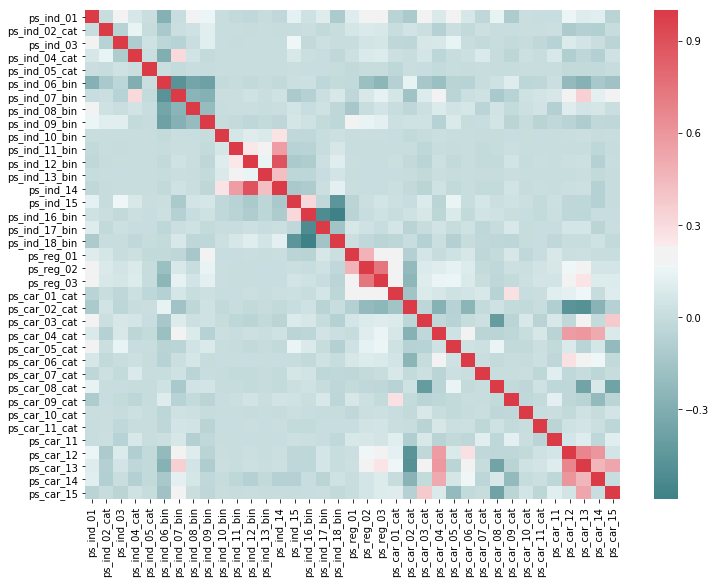

In [10]:
corr_values = values.copy()
for col in values:
    if 'calc' in col:
        corr_values.remove(col)
plt.figure(figsize = (12, 9))
sns.heatmap(train[corr_values].corr(), annot = False, cmap = sns.diverging_palette(200, 10, as_cmap=True))

## 各类特征分析
### 二分类特征分析

In [11]:
import plotly.offline as pltoff
import plotly.graph_objs as go

train_bin_zero_list = []
train_bin_one_list = []
for col in bin_cols:
    temp = train[col].value_counts()
    zero = temp[0]
    one = temp[1]
    train_bin_zero_list.append(zero)
    train_bin_one_list.append(one)

train_trace1 = go.Bar(x = bin_cols,
               y = train_bin_zero_list,
               name = 'zero_counts')
train_trace2 = go.Bar(x = bin_cols,
               y = train_bin_one_list,
               name = 'one_counts')
train_bin_plot_data = [train_trace1, train_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(layout = layout, data = train_bin_plot_data)
pltoff.iplot(fig, filename = 'stack-bar')
##ps_ind_14与ps_ind_10,ps_ind_11,ps_ind_12,ps_ind_13相关，而这3项空值较多

In [13]:
import plotly.offline as pltoff
import plotly.graph_objs as go

test_bin_zero_list = []
test_bin_one_list = []

for col in bin_cols:
    temp = test[col].value_counts()
    test_bin_zero_list.append(temp[0])
    test_bin_one_list.append(temp[1])

test_trace1 = go.Bar(x = bin_cols,
                    y = test_bin_zero_list,
                    name = 'zero counts')
test_trace2 = go.Bar(x = bin_cols,
                    y = test_bin_one_list,
                    name = 'one counts')
test_bin_plot_data = [test_trace1, test_trace2]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(data = test_bin_plot_data, layout = layout)
pltoff.iplot(fig, filename = 'stack-bar')

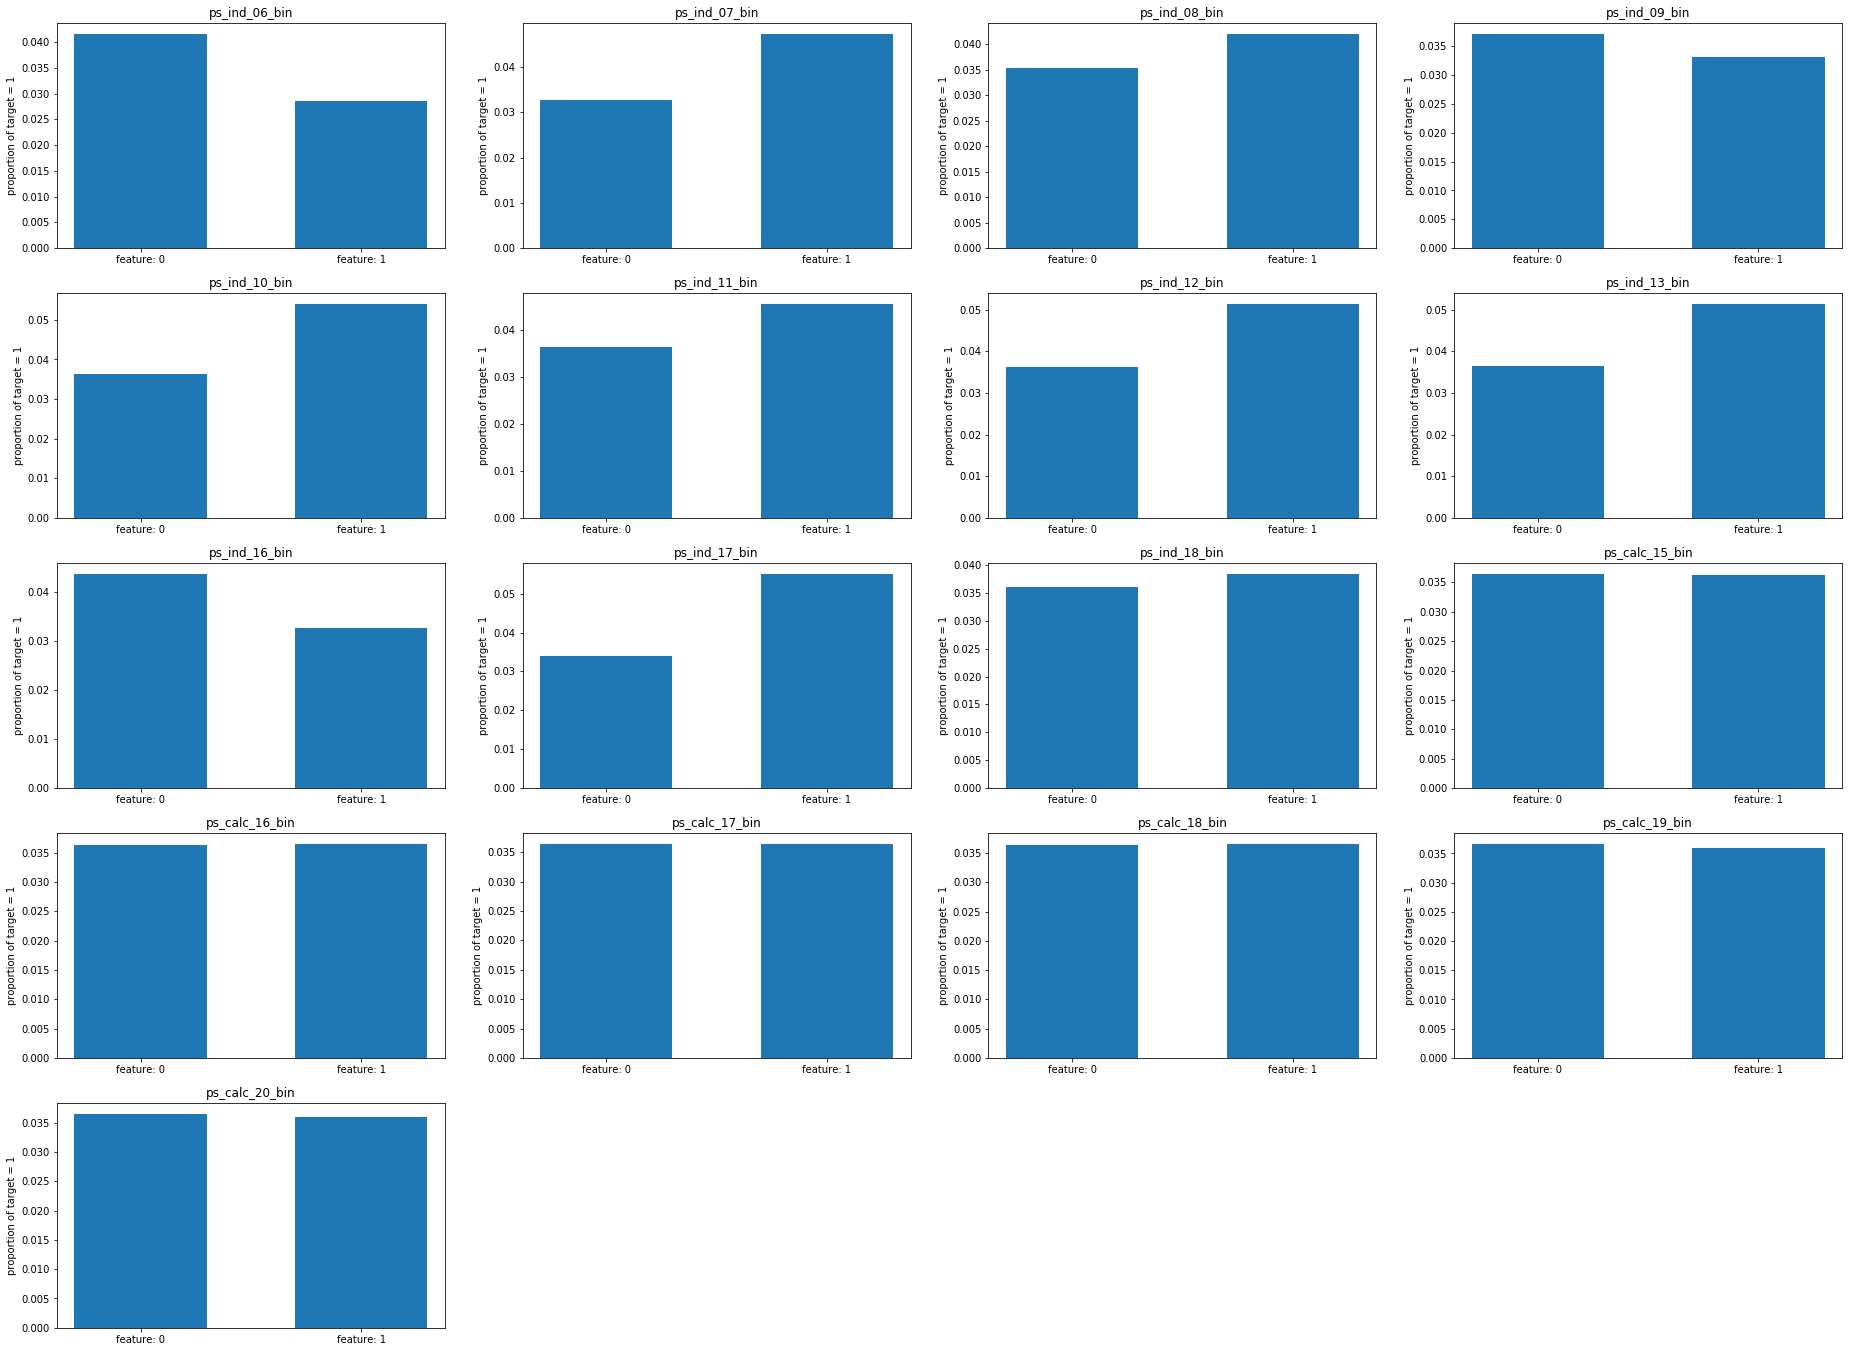

In [15]:
train_1 = train[train.target == 1]
train_0 = train[train.target == 0]

k = 0
plt.figure(figsize = (32,24))
for col in bin_cols:
    k += 1
    temp0 = train_0[col].value_counts()
    bin_zero_t0 = temp0[0]
    bin_one_t0 = temp0[1]
    temp1 = train_1[col].value_counts()
    bin_zero_t1 = temp1[0]
    bin_one_t1 = temp1[1]
    one_list = (bin_zero_t1 / (bin_zero_t0 + bin_zero_t1), bin_one_t1 / (bin_one_t0 + bin_one_t1))
    plt.subplot(5, 4, k) 
    plt.ylabel('proportion of target = 1')
    plt.title(col)
    plt.bar(('feature: 0', 'feature: 1'), one_list, width = 0.6, label = 'target: 1')

### 多分类特征分析

#### 特征对target的影响

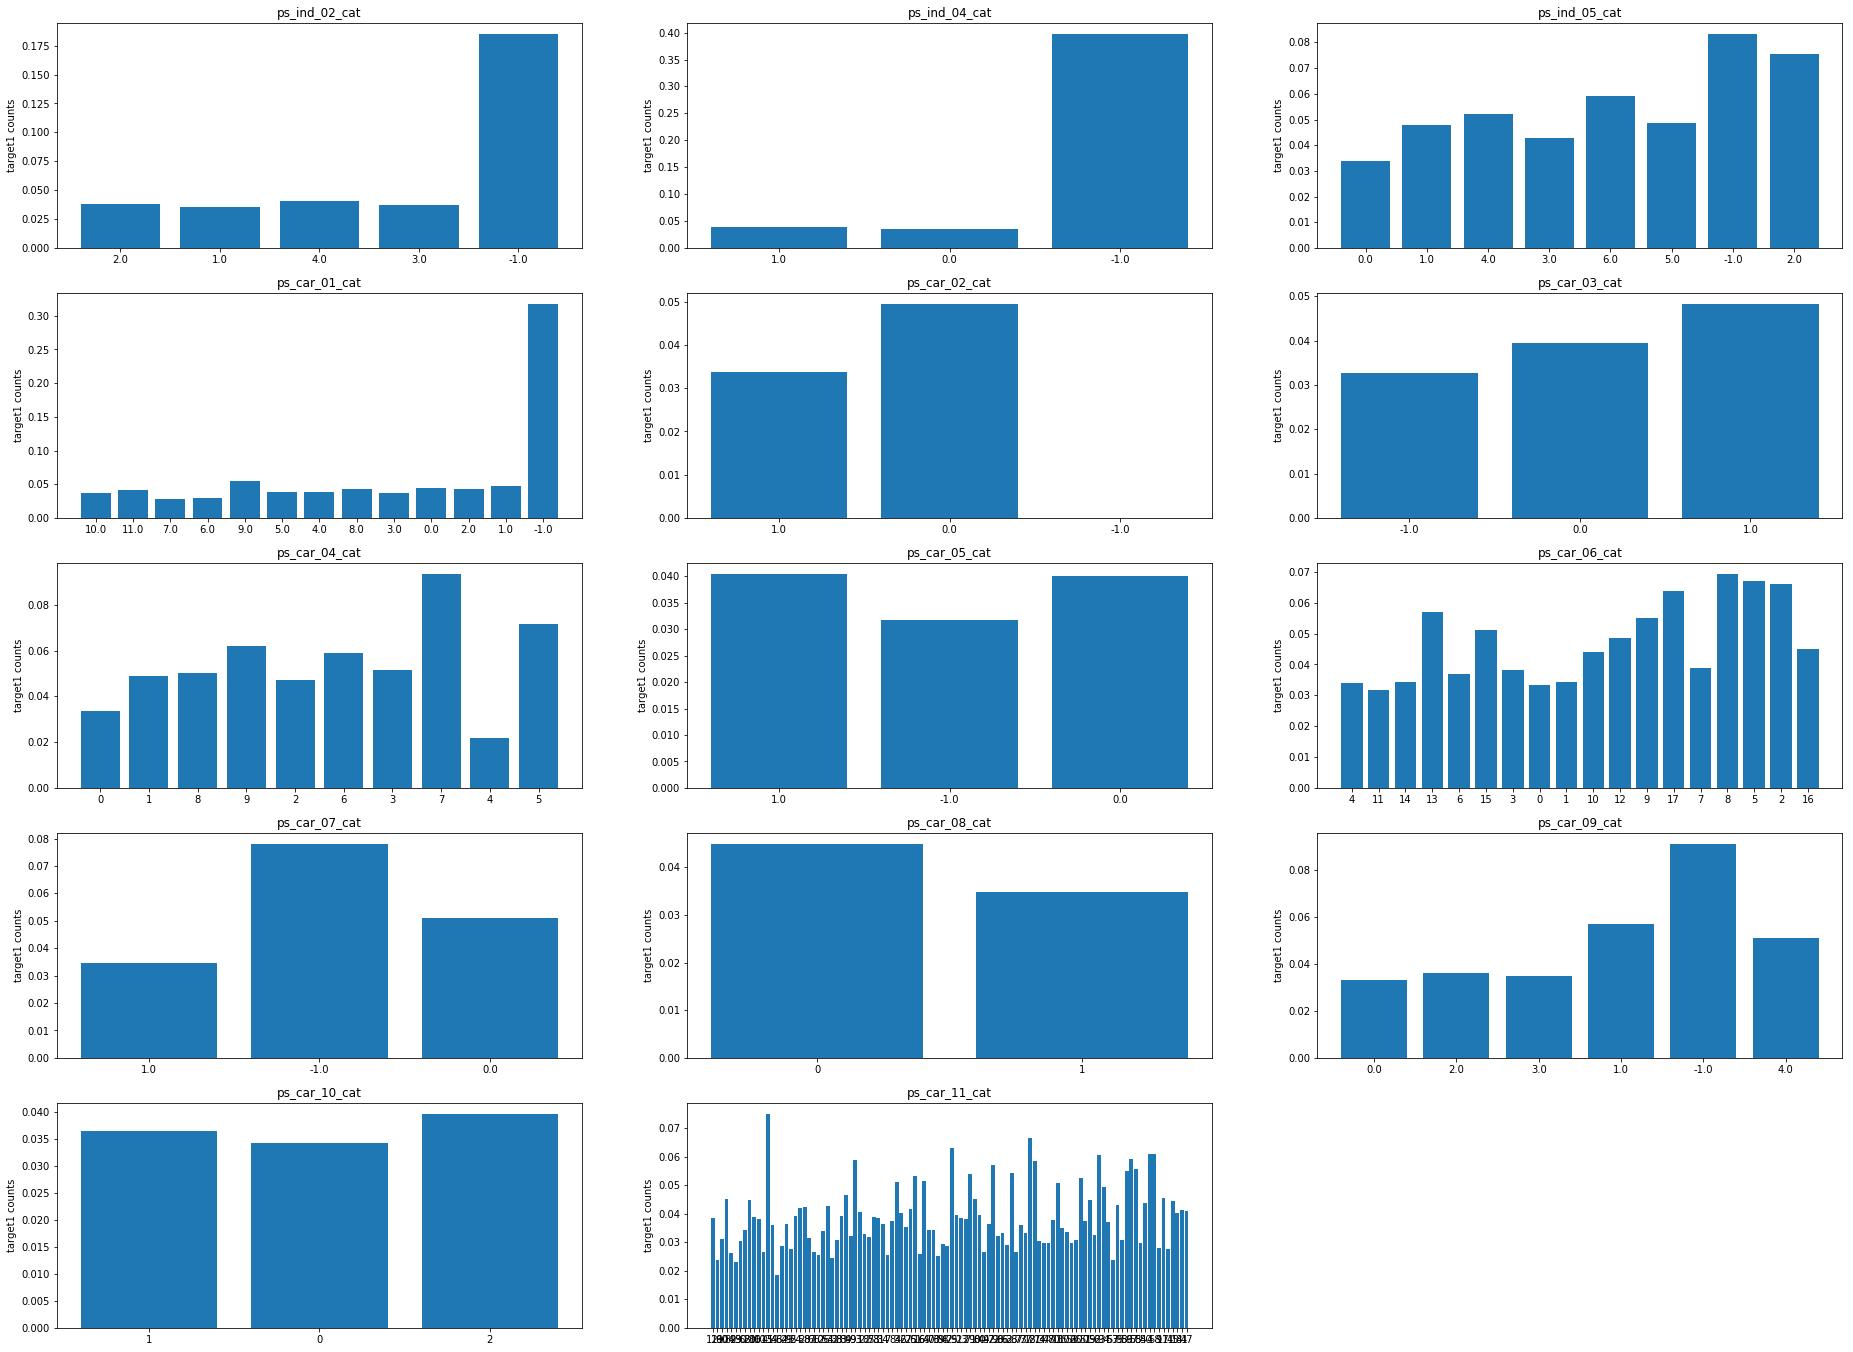

In [16]:
train_cate = train.fillna(-1).copy()
plt.figure(figsize = (32, 24))
k = 0
for col in cat_cols:
    k += 1
    names = []
    cate_t0 = []
    cate_t1 = []
    one_list = []
    for i in train_cate[col].unique():
        names.append(str(i))
        target = train_cate.loc[train_cate[col] == i, ['target']]
        if len(target['target'].unique()) == 2:
            cate_t0.append(target['target'].value_counts(sort = False)[0])
            cate_t1.append(target['target'].value_counts(sort = False)[1])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 1: 
            cate_t0.append(0)
            cate_t1.append(target['target'].value_counts()[0])
        if len(target['target'].unique()) == 1 and target['target'].unique()[0] == 0:
            cate_t0.append(target['target'].value_counts()[0])
            cate_t1.append(0)
        
    for i in zip(cate_t0, cate_t1):
        one_list.append(i[1] / (i[0] + i[1]))
    plt.subplot(5, 3, k)
    plt.title(col)
    plt.ylabel('target1 counts')
    plt.bar(names, one_list)

#### 训练数据多分类特征分析

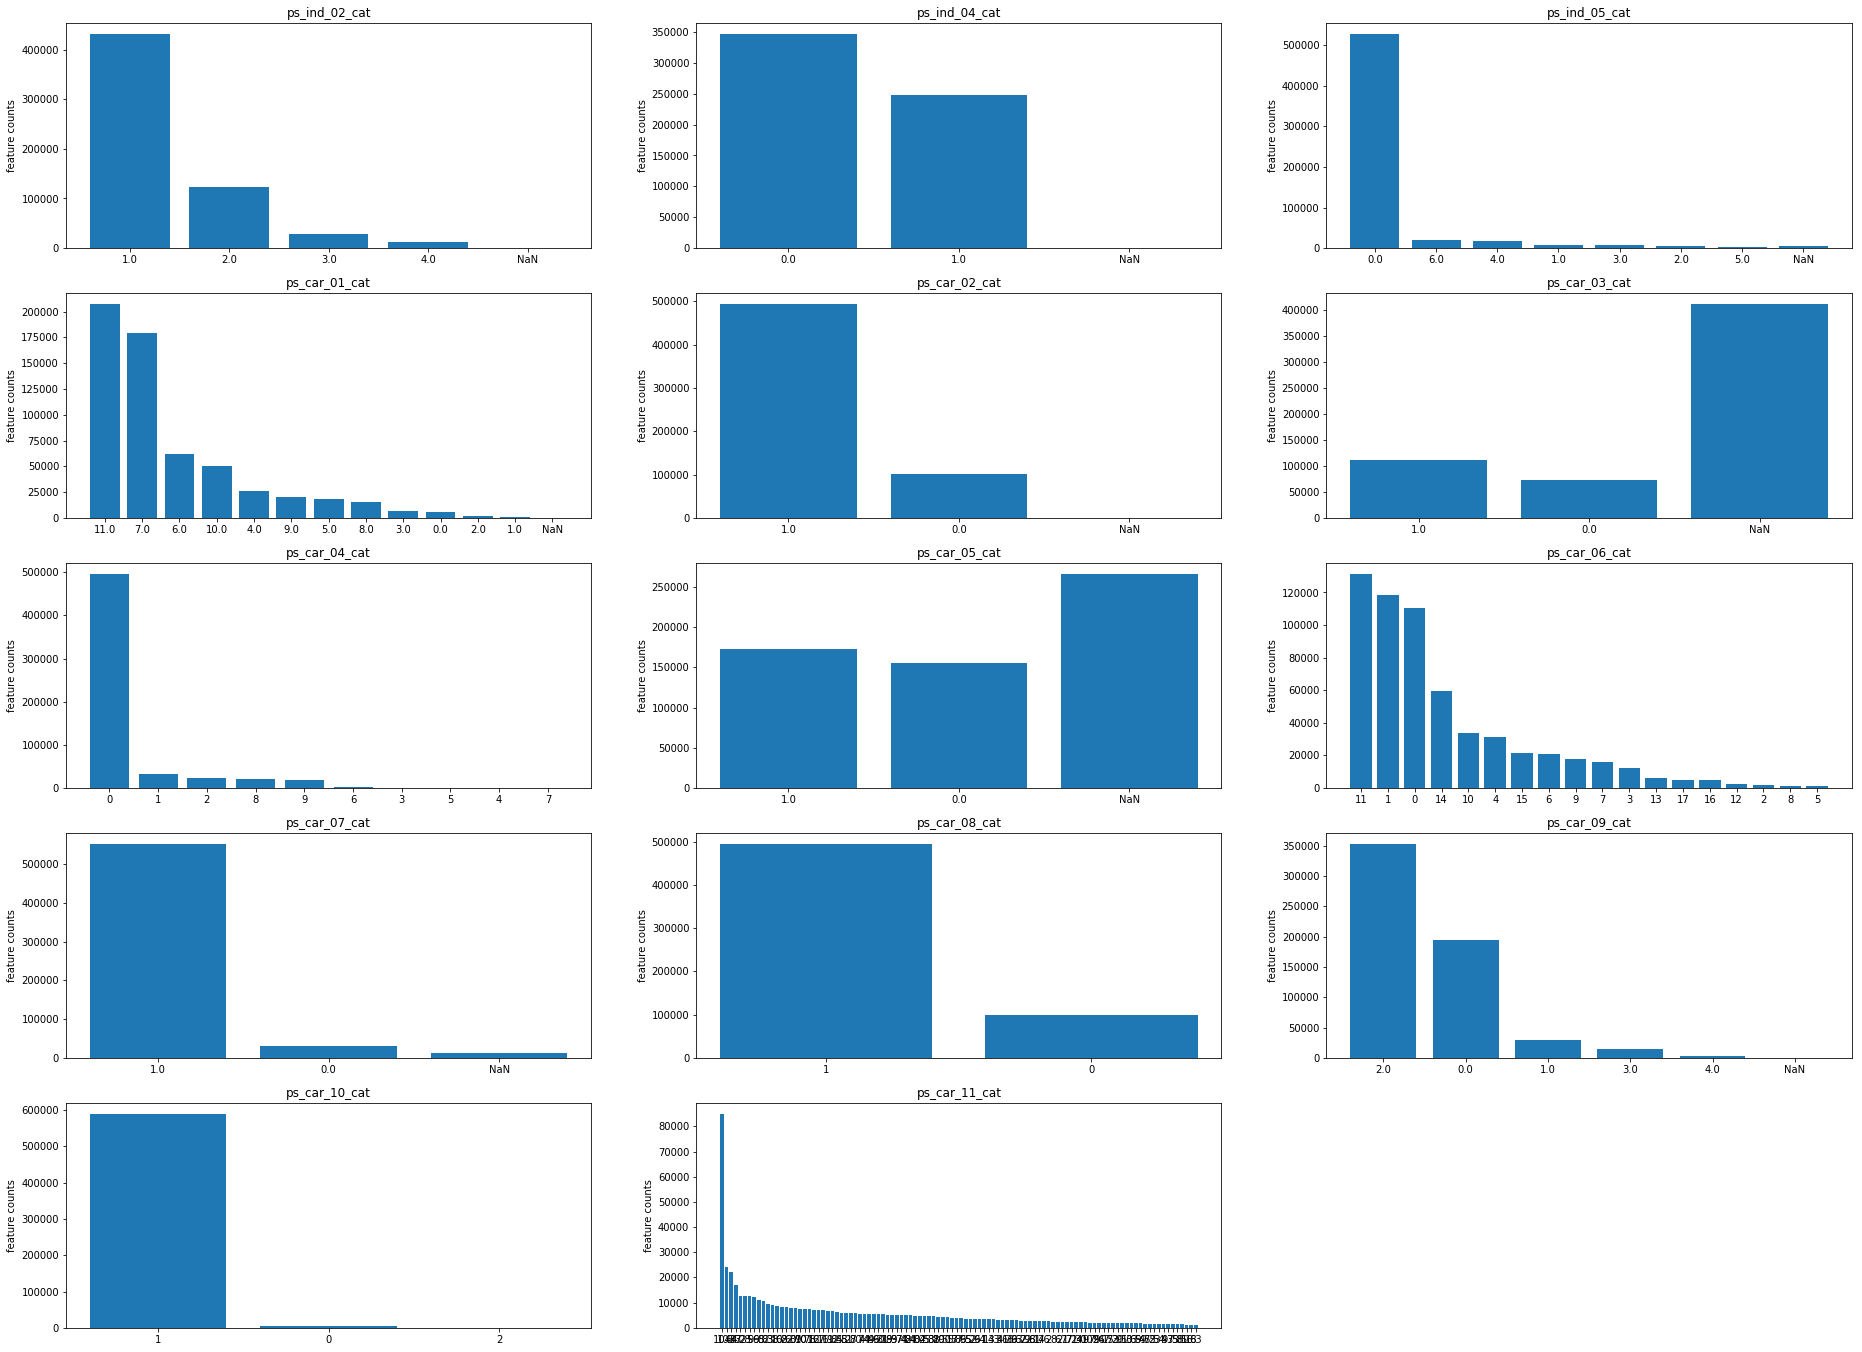

In [17]:
k = 0
plt.figure(figsize = (32, 24))
for col in cat_cols:
    k += 1
    names = list(train[col].value_counts().index.astype('str'))
    counts = list(train[col].value_counts().values.astype('float64'))
    if col in train_col_missing:
        names.append('NaN')
        counts.append(len(train[col]) - sum(counts))
    plt.subplot(5, 3, k)
    plt.title(col)
    plt.ylabel('feature counts')
    plt.bar(names, counts)

#### 测试数据多分类特征分析

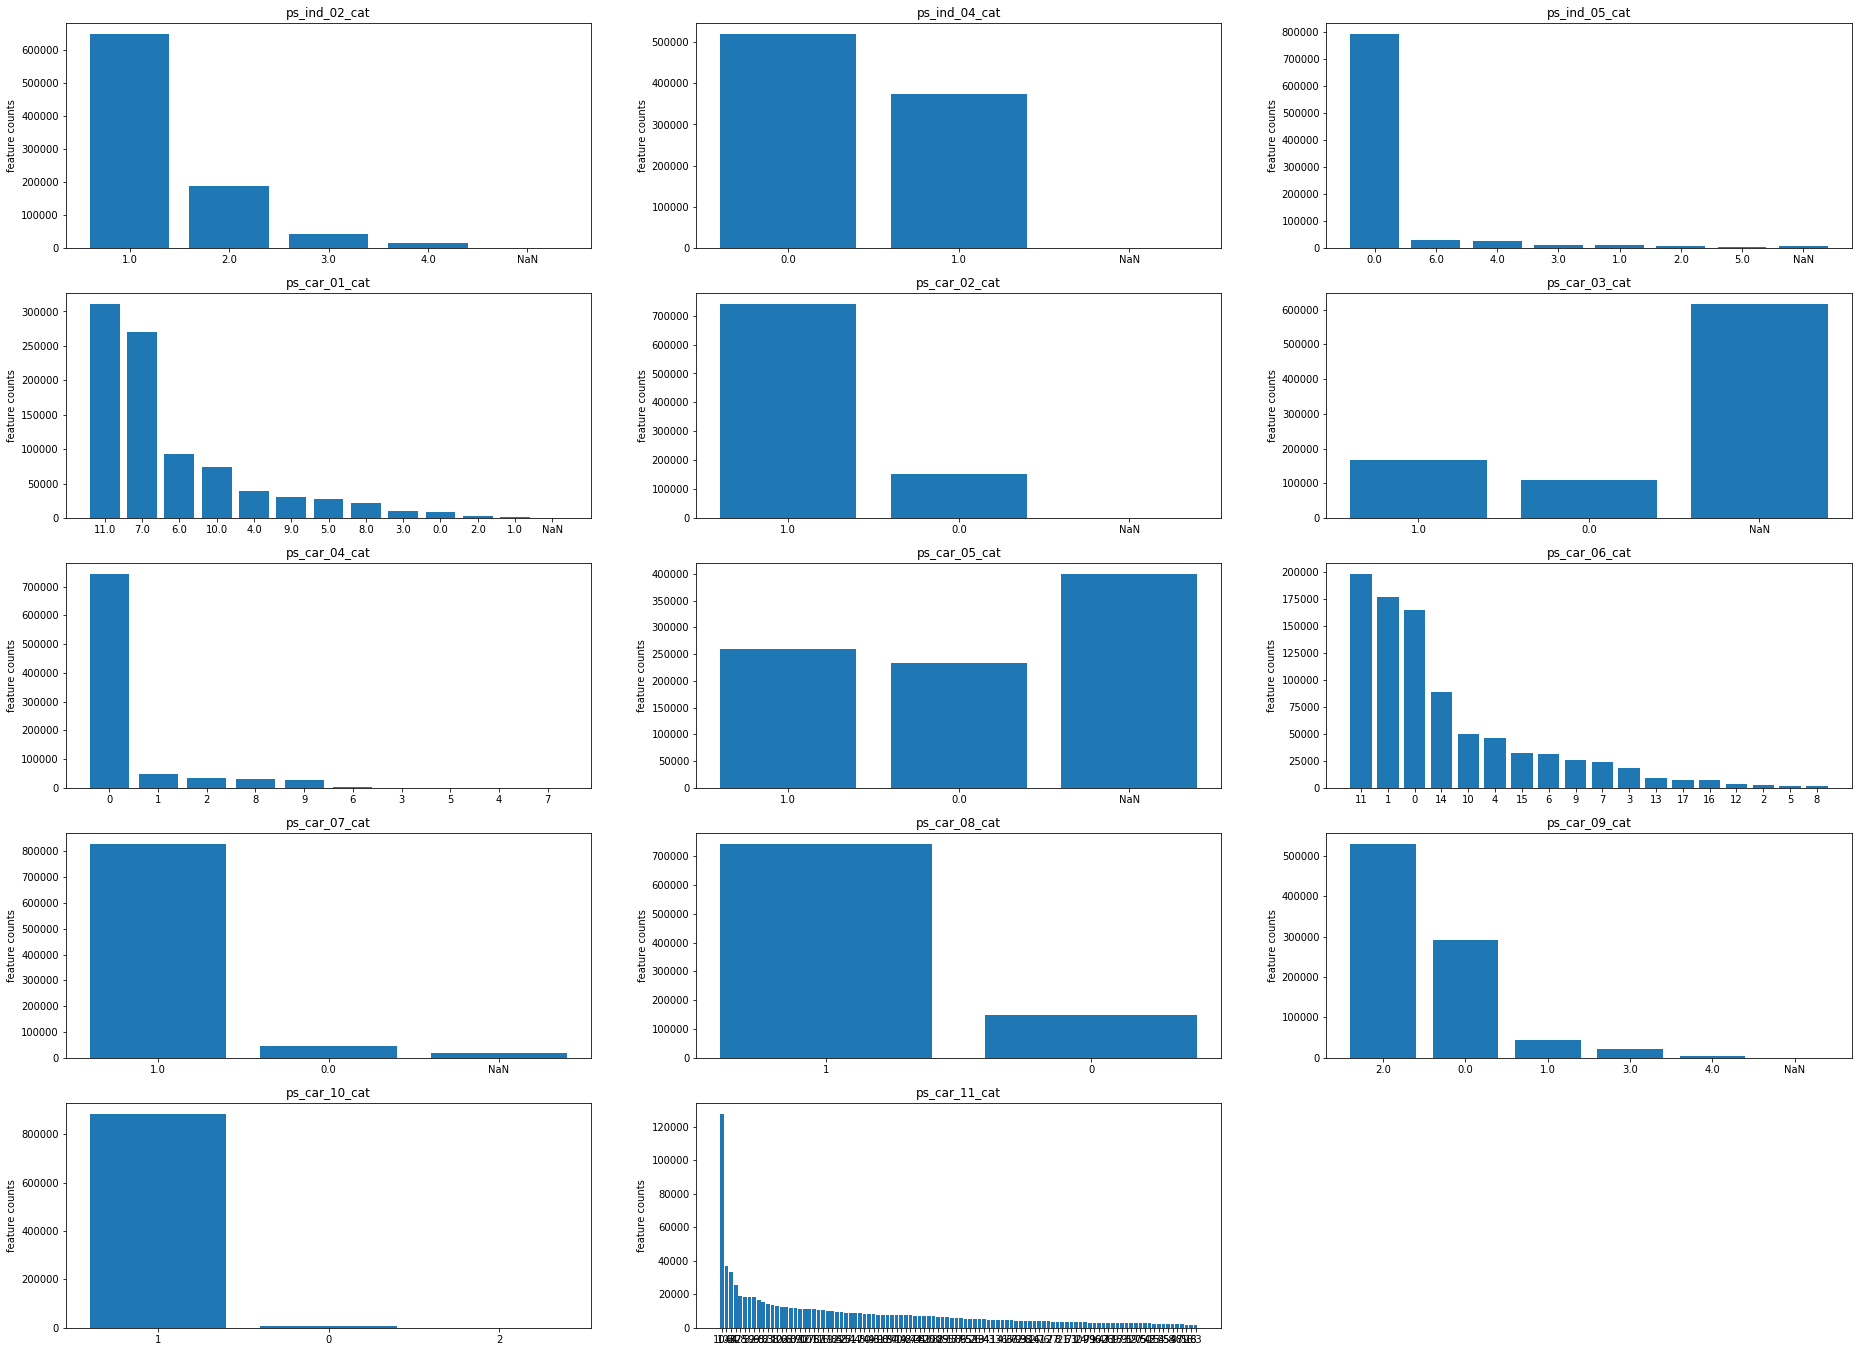

In [18]:
k = 0
plt.figure(figsize = (32, 24))
for col in cat_cols:
    k += 1
    names = list(test[col].value_counts().index.astype('str'))
    counts = list(test[col].value_counts().values.astype('float64'))
    if col in test_col_missing:
        names.append('NaN')
        counts.append(len(test[col]) - sum(counts))
    plt.subplot(5, 3, k)
    plt.title(col)
    plt.ylabel('feature counts')
    plt.bar(names, counts)

### 顺序与连续特征分析

In [19]:
list1 = []
for col in cate_con_or_ord:
    list1.append((col, len(train[col].unique())))
for i in sorted(list1, key = lambda x: x[1], reverse = True):
    print(i)

('ps_car_13', 70482)
('ps_reg_03', 5013)
('ps_car_14', 850)
('ps_car_12', 184)
('ps_calc_10', 26)
('ps_calc_14', 24)
('ps_calc_11', 20)
('ps_reg_02', 19)
('ps_car_15', 15)
('ps_ind_15', 14)
('ps_calc_13', 14)
('ps_ind_03', 12)
('ps_calc_06', 11)
('ps_calc_08', 11)
('ps_calc_12', 11)
('ps_reg_01', 10)
('ps_calc_01', 10)
('ps_calc_02', 10)
('ps_calc_03', 10)
('ps_calc_07', 10)
('ps_ind_01', 8)
('ps_calc_09', 8)
('ps_calc_05', 7)
('ps_calc_04', 6)
('ps_ind_14', 5)
('ps_car_11', 5)


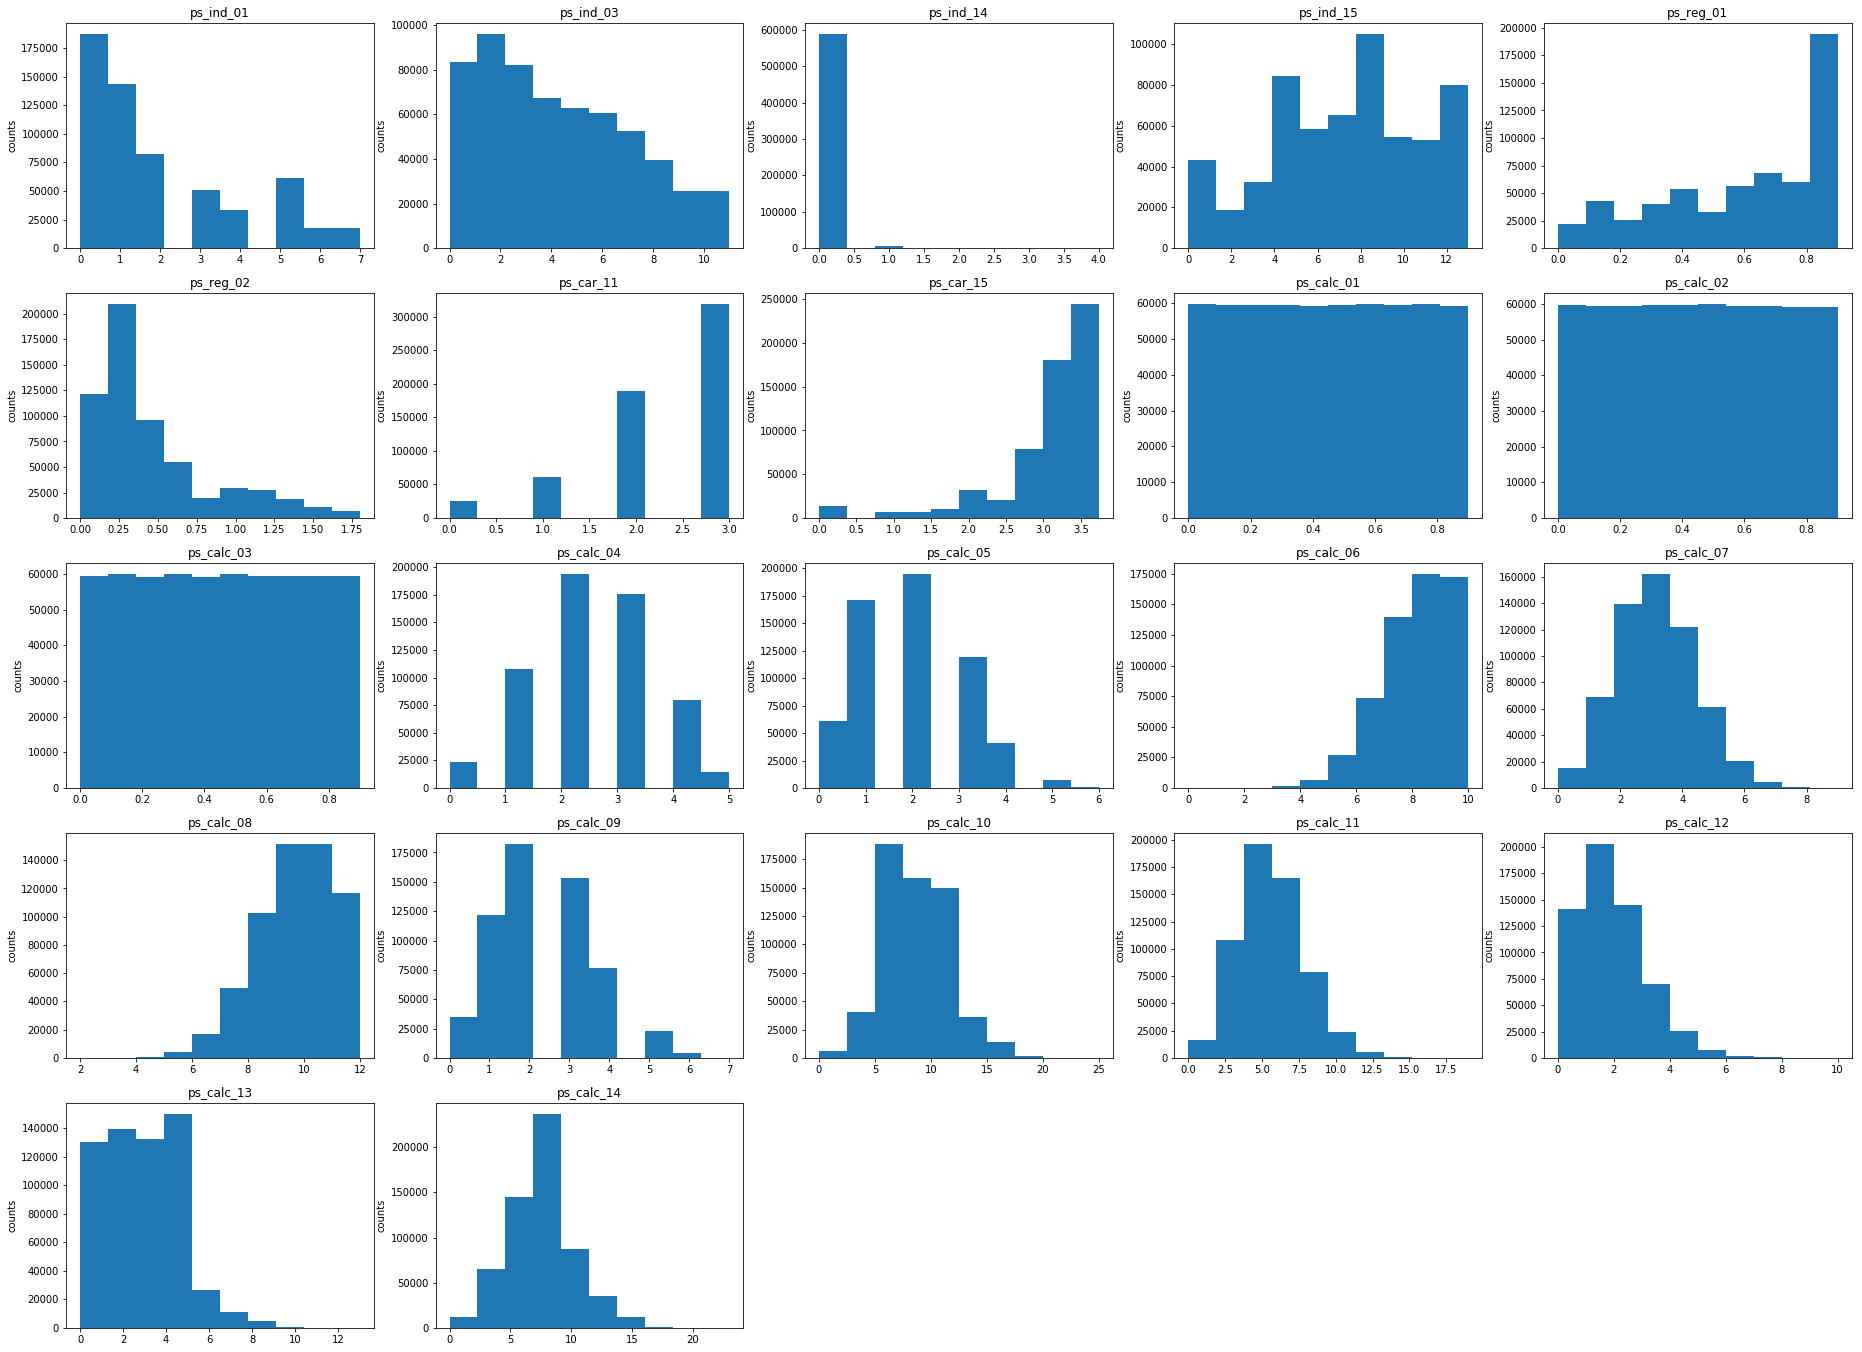

In [20]:
conti_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']
conti_or_ord = cate_con_or_ord.copy()
for i in conti_cols:
    conti_or_ord.remove(i)
    
k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    plt.subplot(5, 5, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.hist(train[col].dropna())

E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



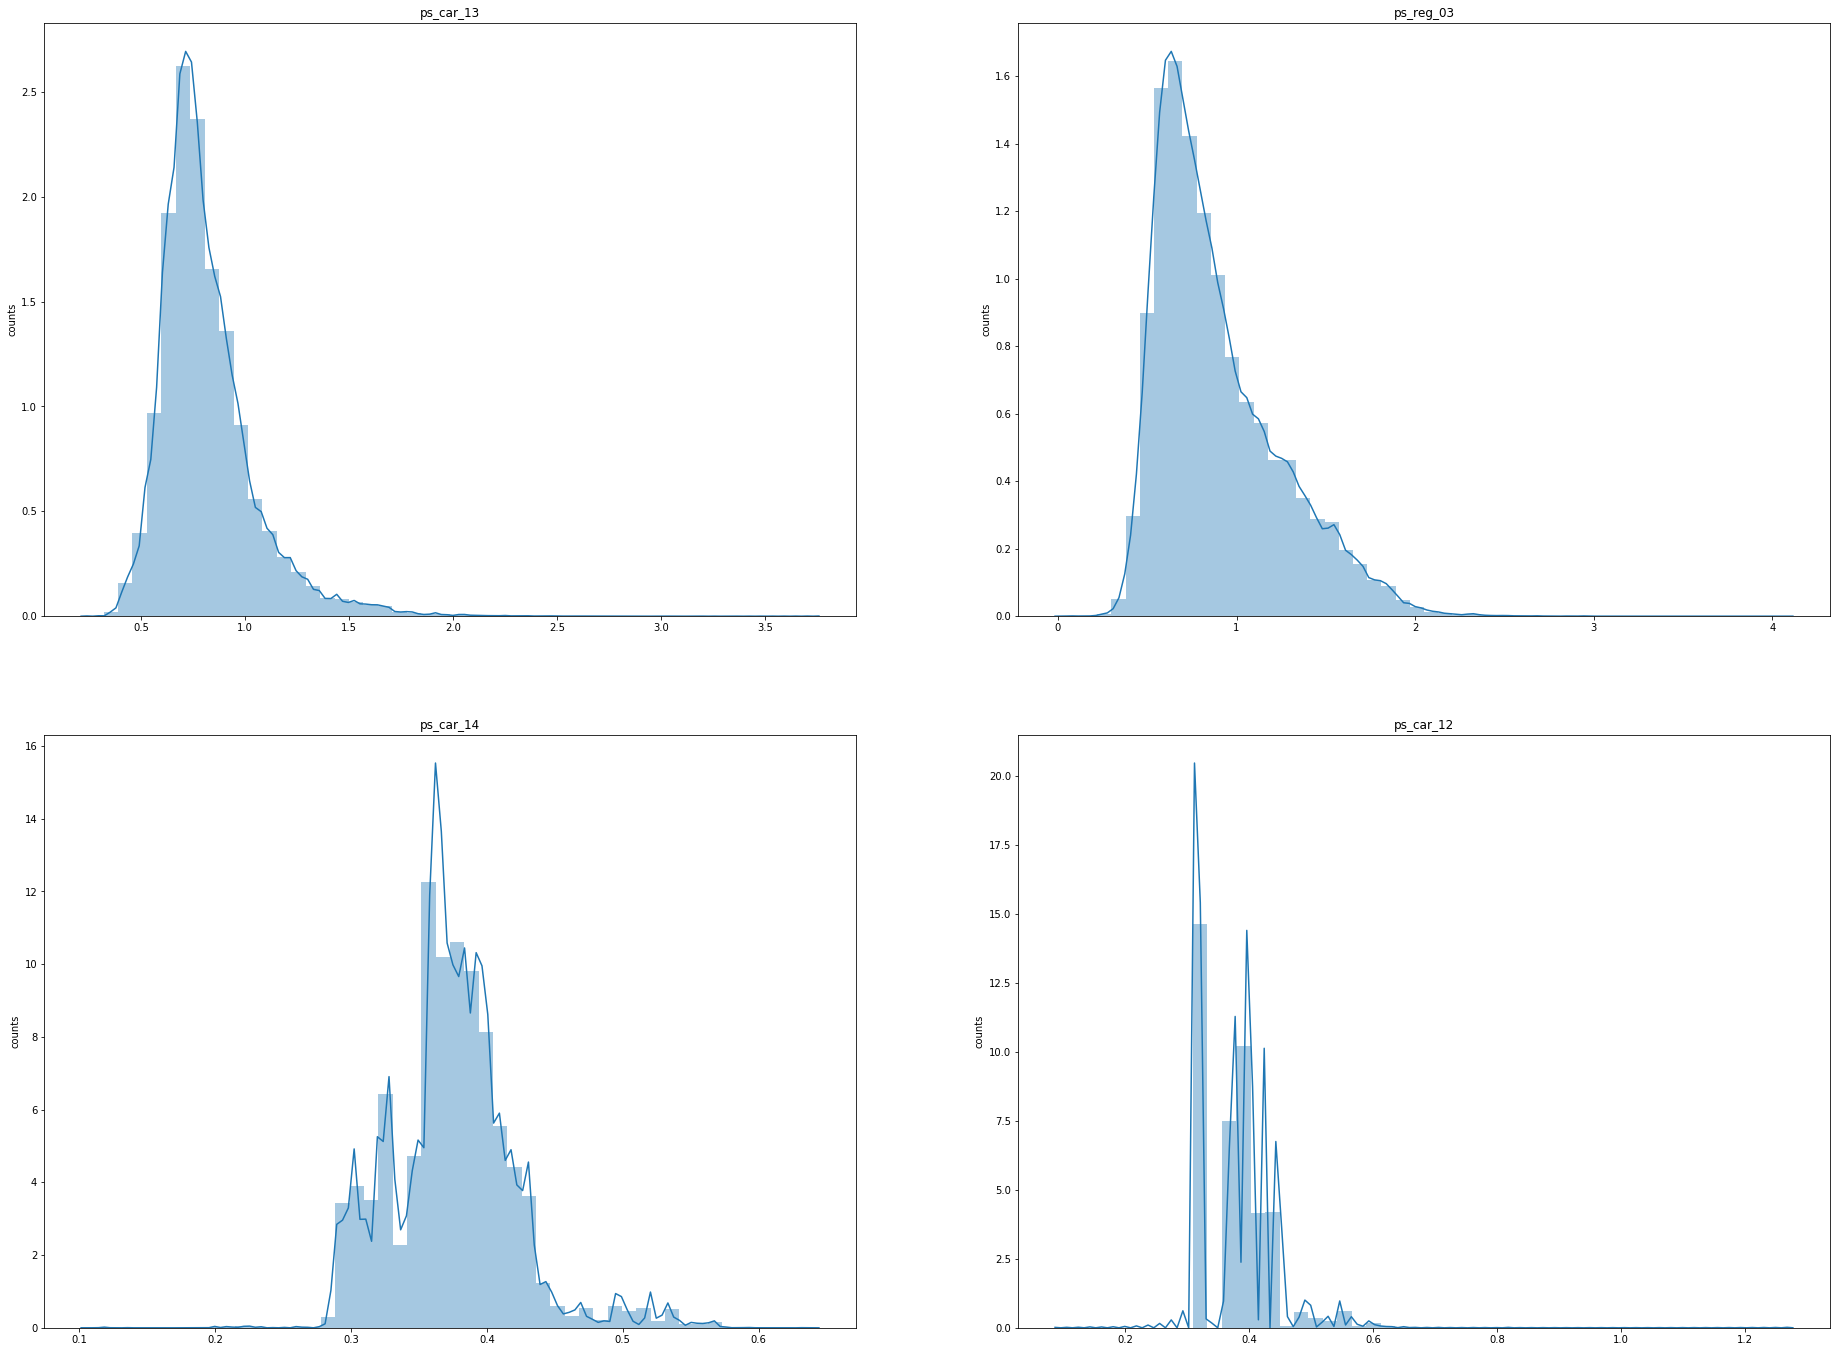

In [21]:
k = 0
plt.figure(figsize = (32, 24))
for col in conti_cols:
    k += 1
    plt.subplot(2, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    sns.distplot(tuple(train[col].dropna()))

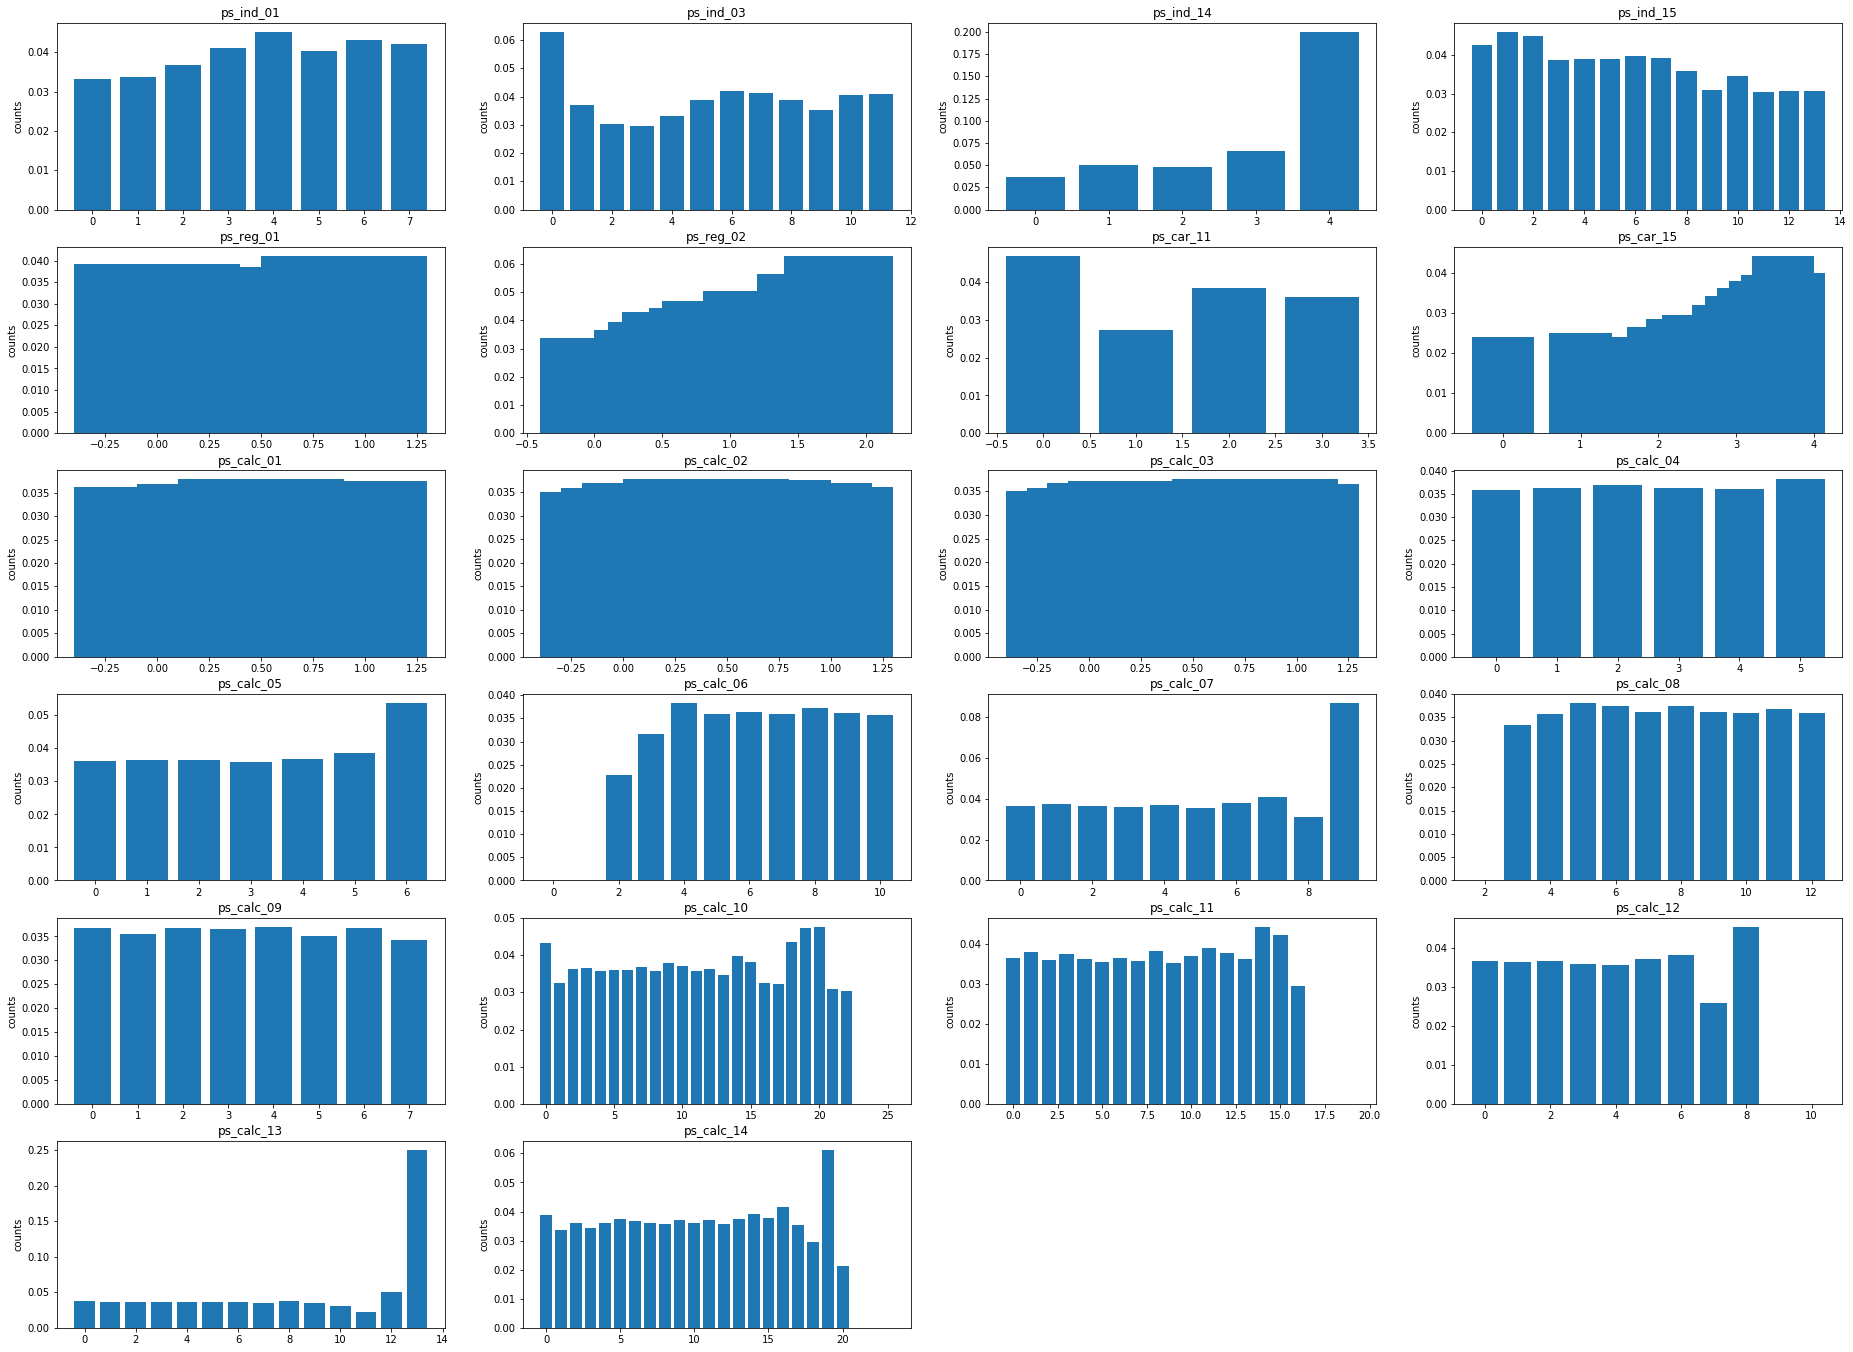

In [51]:
##第一种写法
train_rank = train[conti_or_ord].copy()
train_rank = train_rank.dropna()
train_rank['target'] = train['target']
train_rank1 = train_rank[train_rank['target'] == 1]
train_rank0 = train_rank[train_rank['target'] == 0]

k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    trace1 = []
    trace0 = []
    names = []
    one_list = []
    for i in train_rank[col].unique():
        names.append(i)
        trace1.append(len(train_rank1[train_rank1[col] == i]))
        trace0.append(len(train_rank0[train_rank0[col] == i]))
    for (x, y) in zip(trace0, trace1):
        one_list.append(y / (x + y))
    plt.subplot(6, 4, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(names, one_list)

E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\pandas\core\series.py:842: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



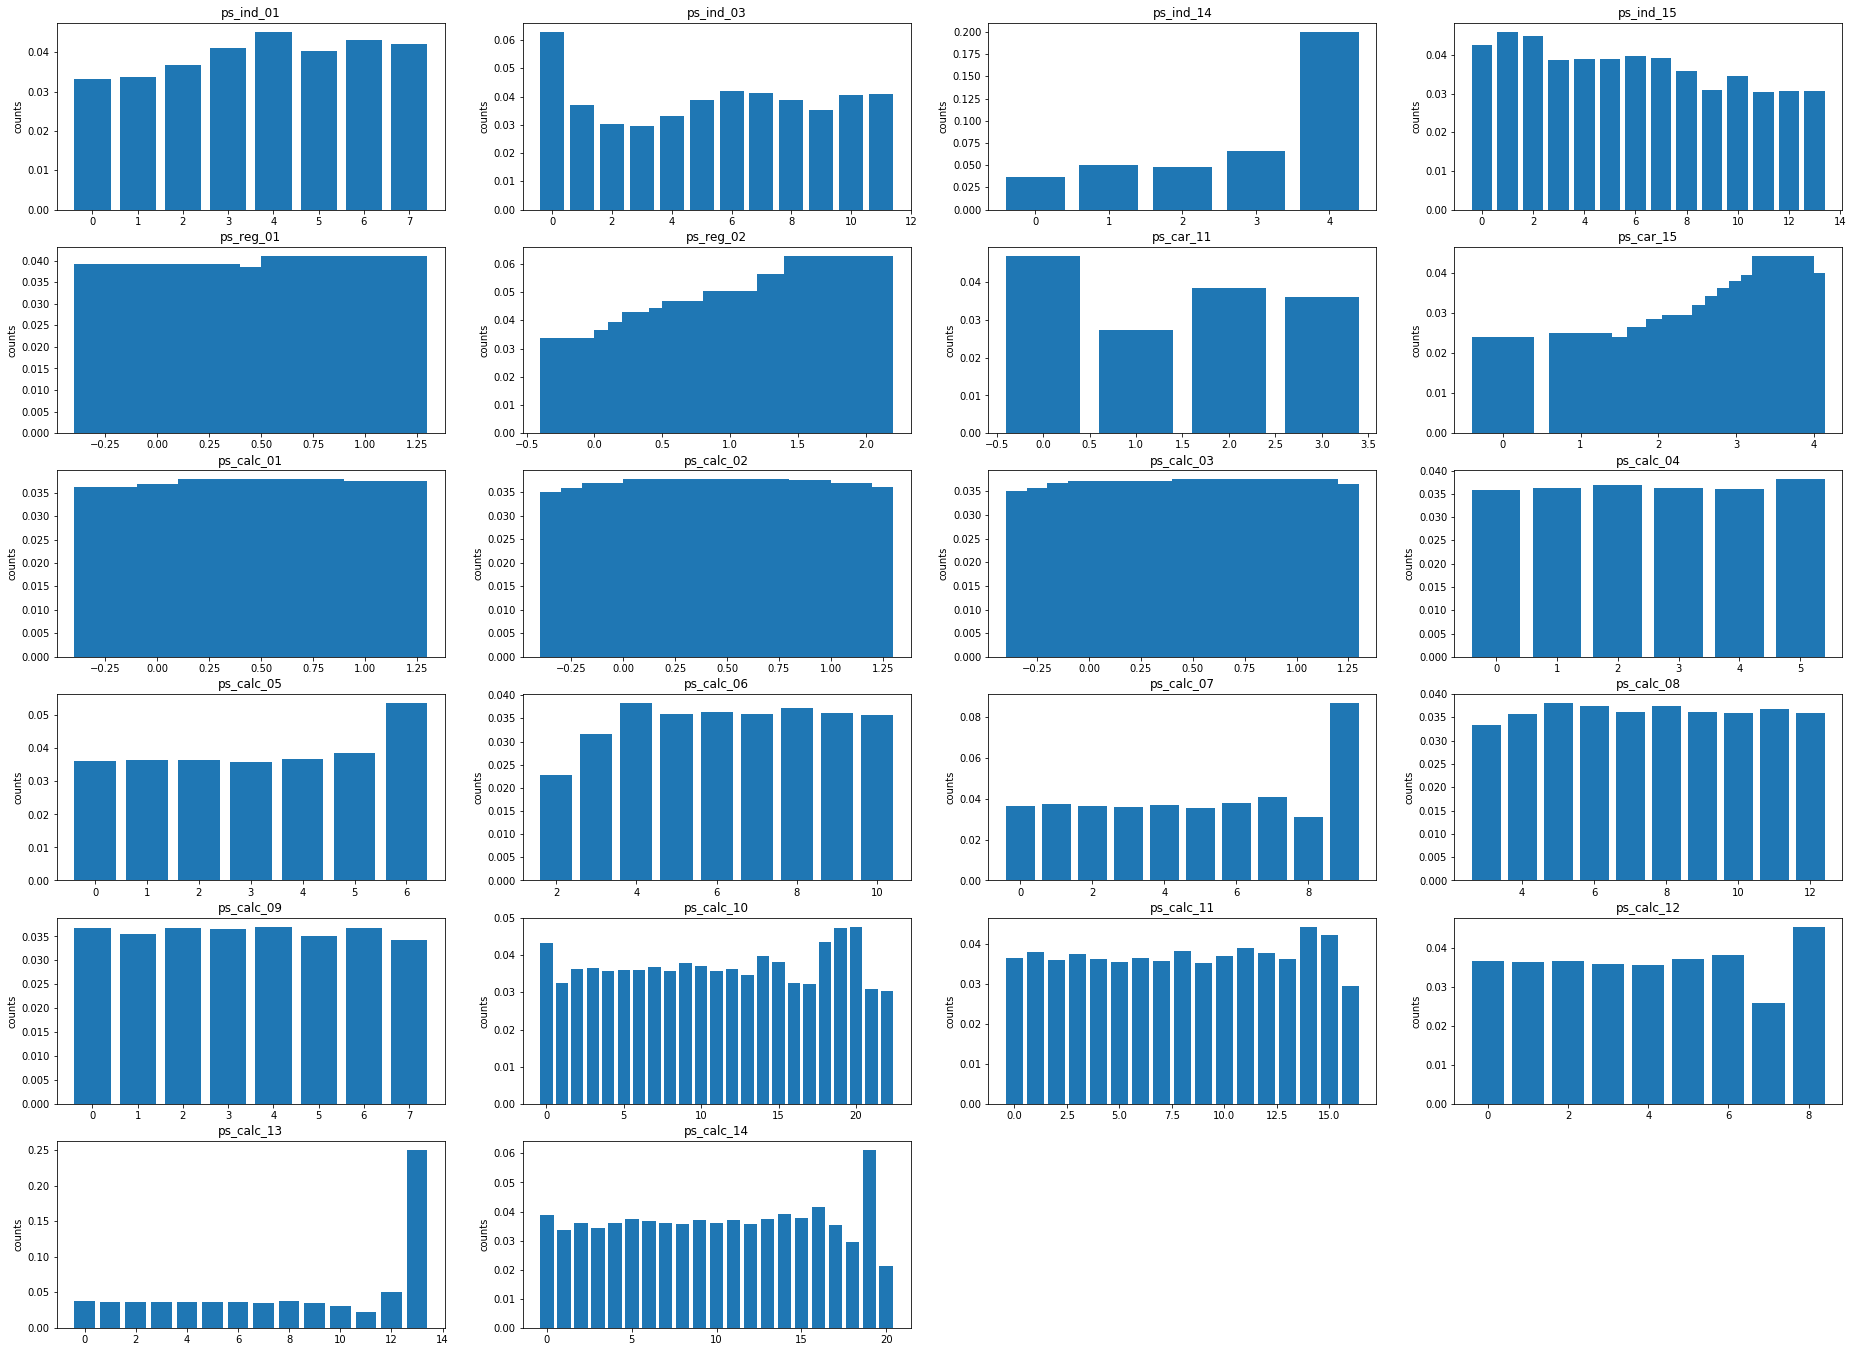

In [48]:
##第二种写法
train_rank = train[conti_or_ord].copy()
train_rank = train_rank.dropna()
train_rank['target'] = train['target']
train_rank1 = train_rank[train_rank['target'] == 1]
train_rank0 = train_rank[train_rank['target'] == 0]

k = 0
plt.figure(figsize = (32, 24))
for col in conti_or_ord:
    k += 1
    one_list = []
    names = train_rank[col].value_counts().index
    trace1 = train_rank1[col].value_counts()[names].values
    trace0 = train_rank0[col].value_counts()[names].values
    for (x, y) in zip(trace0, trace1):
        one_list.append(y / (x + y))
    plt.subplot(6, 4, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(names, one_list)

E:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



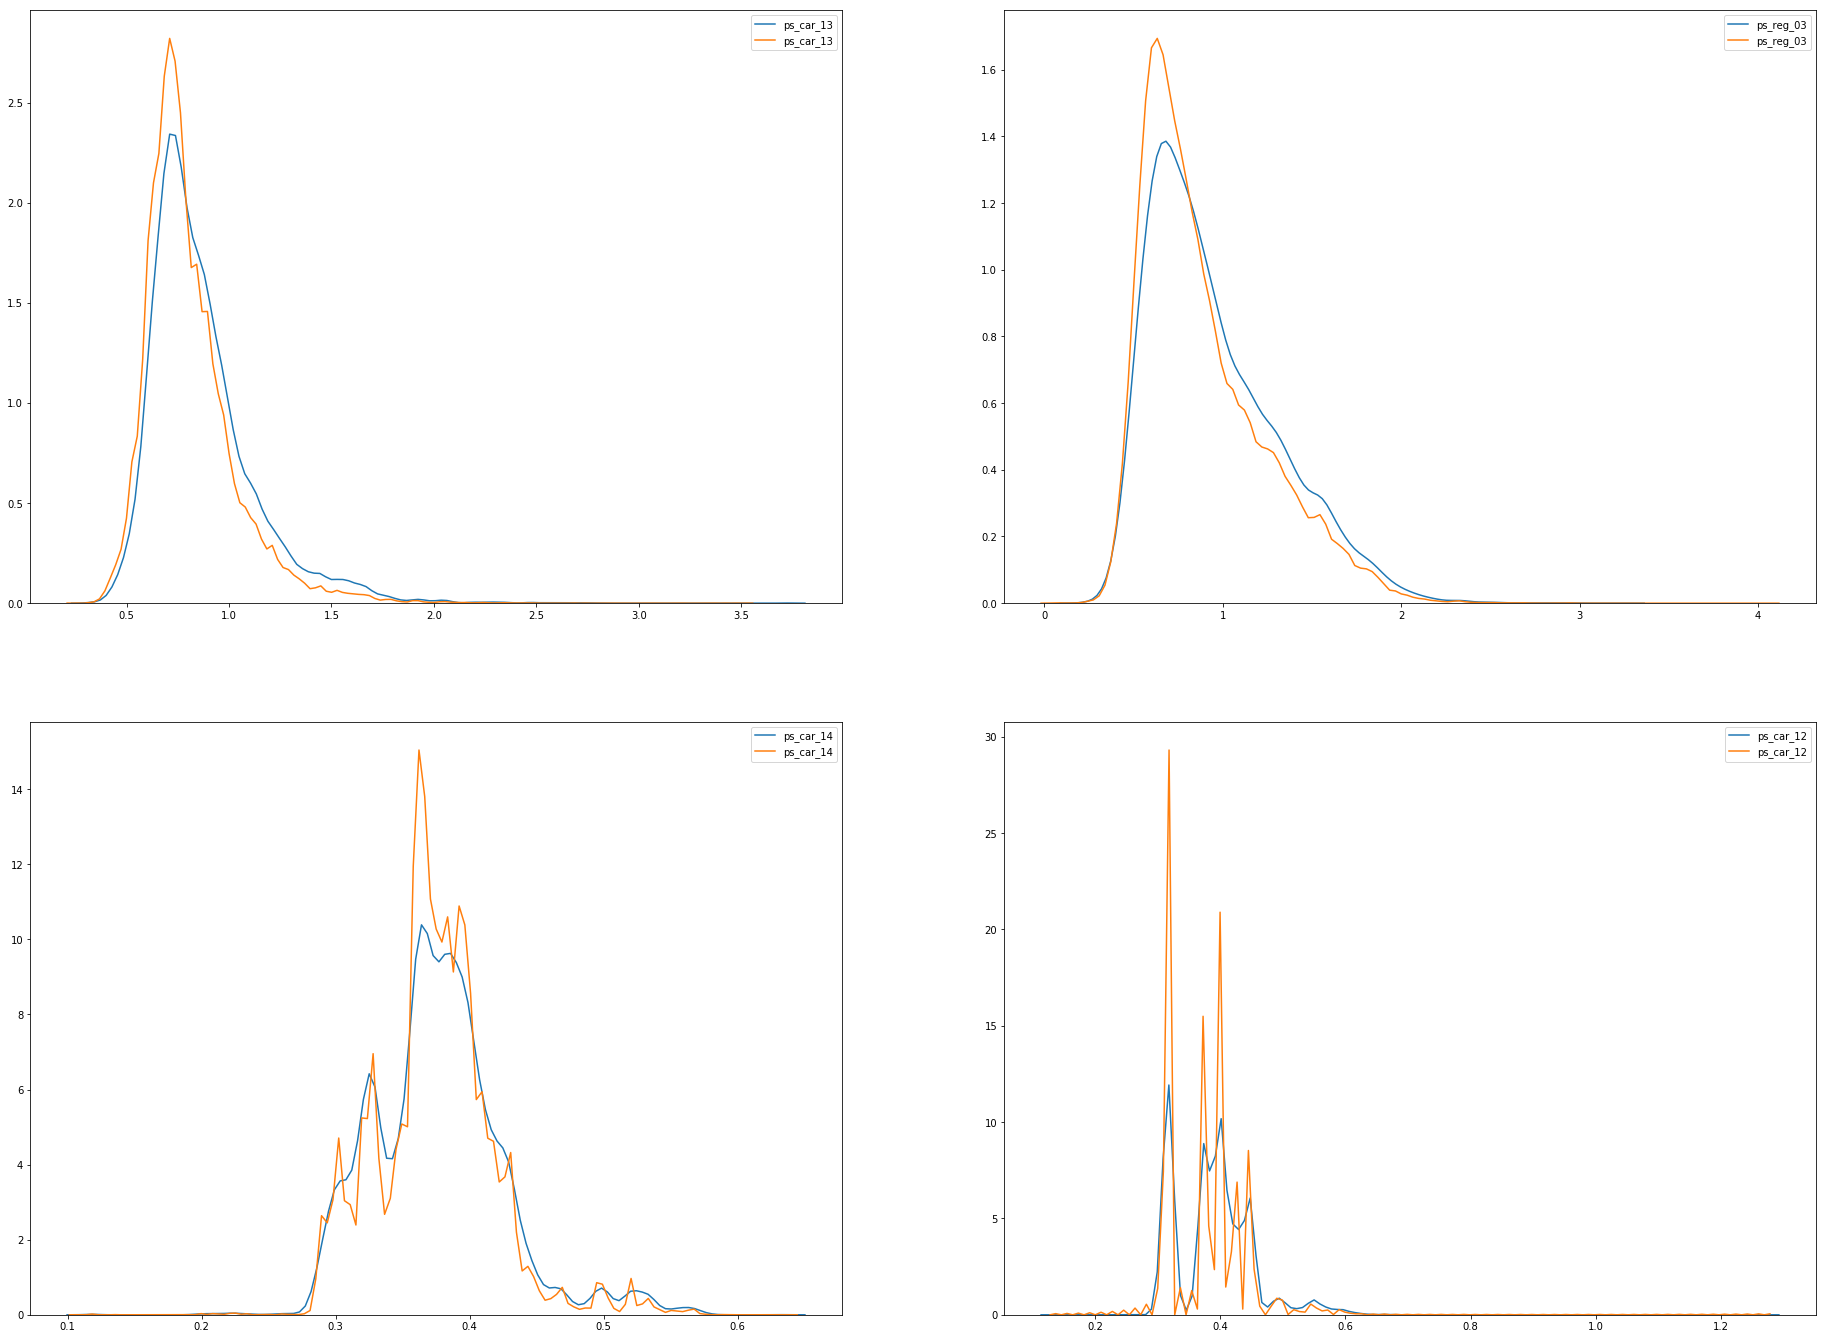

In [57]:
##对连续变量做KDE密度曲线图
train_rank_count = train[conti_cols].copy()
train_rank_count['target'] = train['target']
train_rank_count = train_rank_count.dropna()
train_rank0_count = train_rank_count[train_rank_count['target'] == 1]
train_rank1_count = train_rank_count[train_rank_count['target'] == 0]


k = 0
plt.figure(figsize = (32, 24))
for col in conti_cols:
    k += 1
    plt.subplot(2, 2, k)
    sns.kdeplot(train_rank0_count[col])
    sns.kdeplot(train_rank1_count[col])

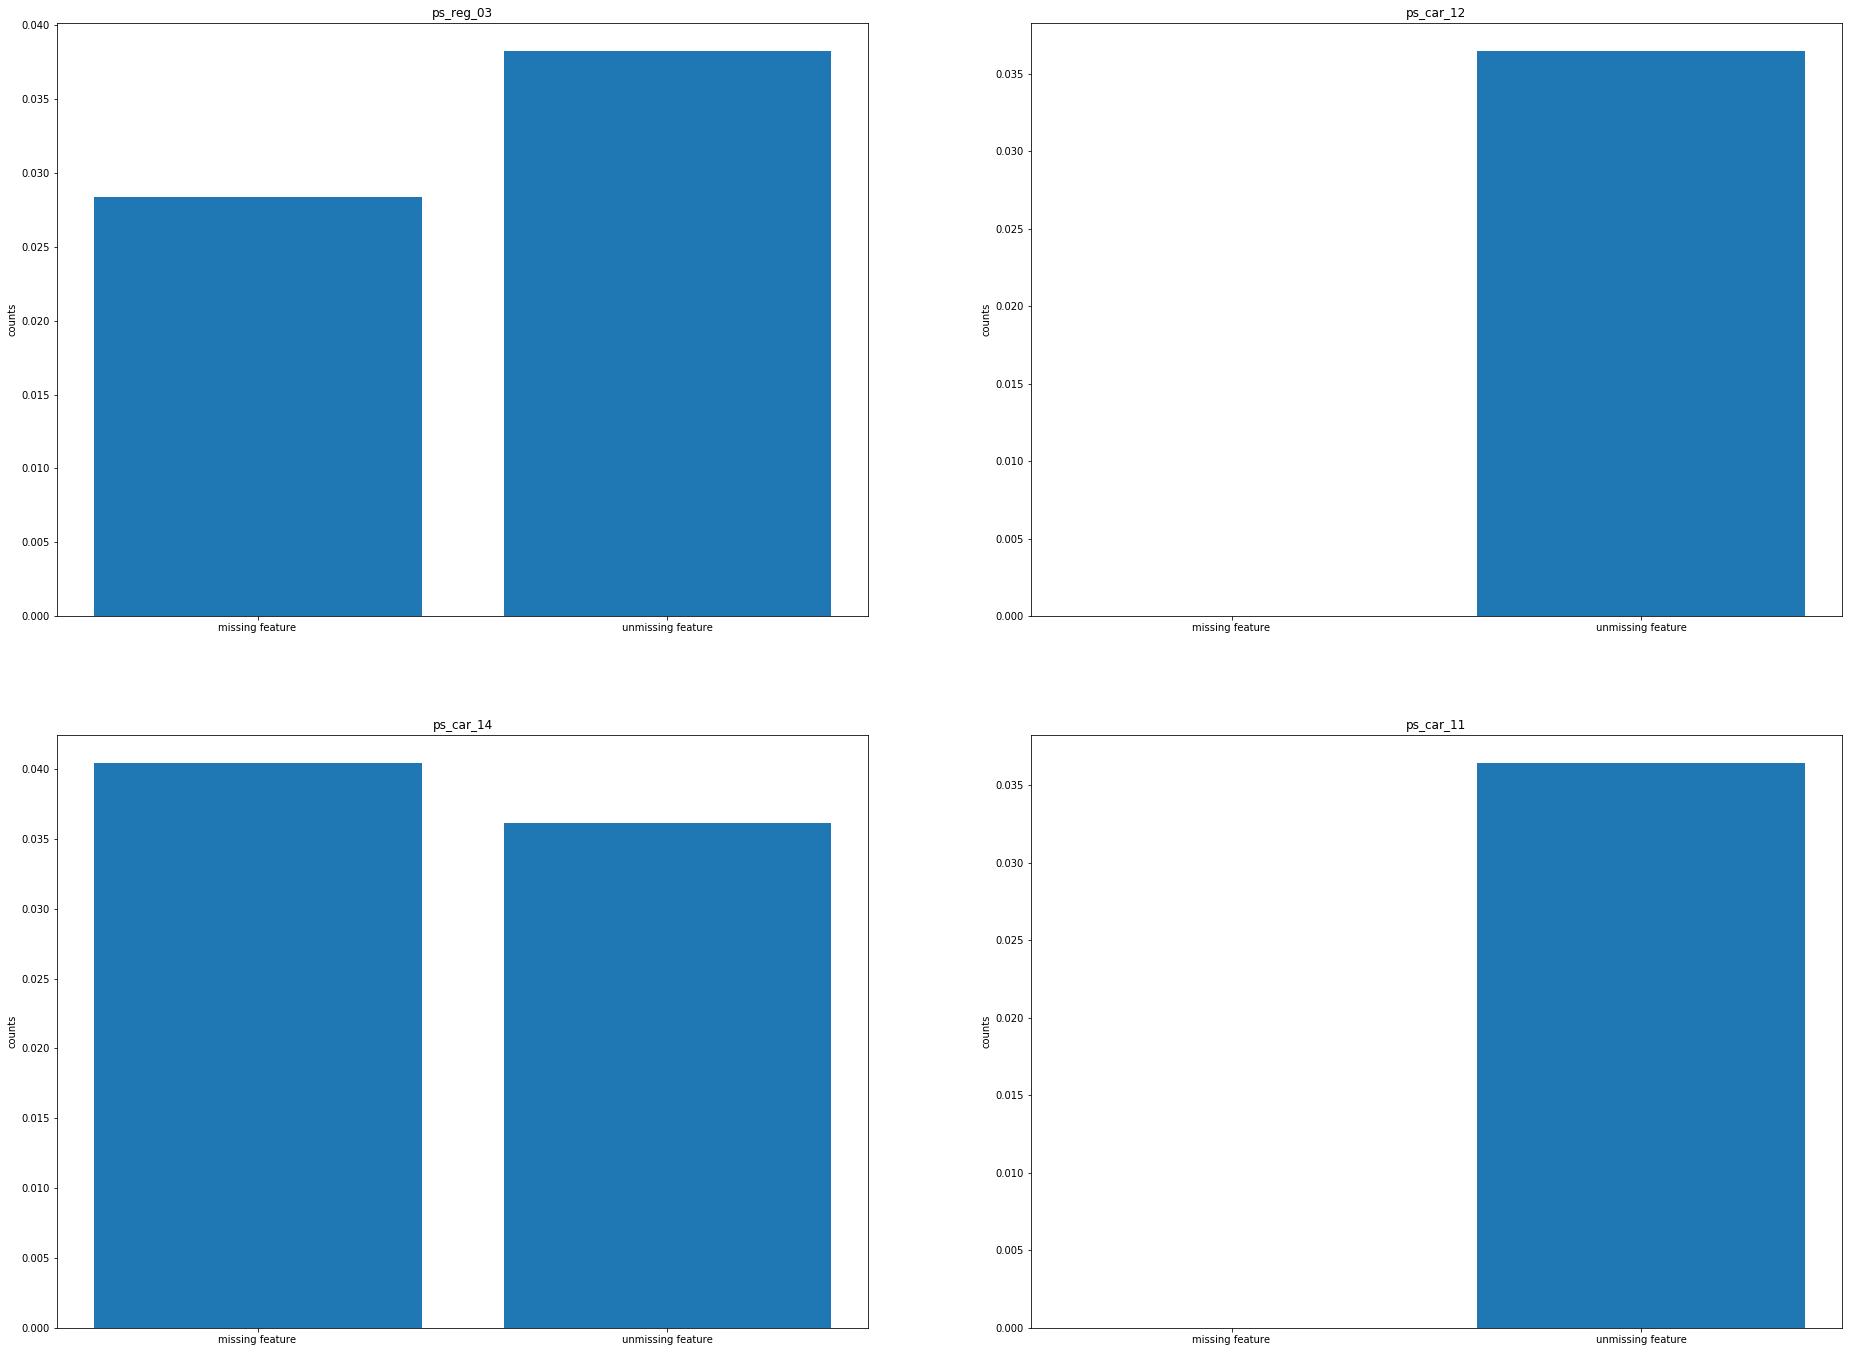

In [65]:
train_missing_cont_ord = list(set(train_col_missing).intersection(set(cate_con_or_ord)))
train_rank_missing_cont_ord = train[train_missing_cont_ord].copy()
train_rank_missing_cont_ord['target'] = train['target']
train_rank0_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 0]
train_rank1_missing_cont_ord = train_rank_missing_cont_ord[
    train_rank_missing_cont_ord['target'] == 1]

k = 0
plt.figure(figsize = (32, 24))
for col in train_missing_cont_ord:
    k += 1
    rank0_col_missing = train_rank0_missing_cont_ord[col].isnull().sum()
    rank0_col_unmissing = len(train_rank0_missing_cont_ord) - rank0_col_missing
    rank1_col_missing = train_rank1_missing_cont_ord[col].isnull().sum()
    rank1_col_unmissing = len(train_rank1_missing_cont_ord) - rank1_col_missing
    one_list = (rank1_col_missing / (rank1_col_missing + rank0_col_missing), 
                   rank1_col_unmissing / (rank1_col_unmissing + rank0_col_unmissing))
    plt.subplot(2, 2, k)
    plt.title(col)
    plt.ylabel('counts')
    plt.bar(('missing feature', 'unmissing feature'), one_list)